# Document Clustering with Python

## Import and read data

In [2]:
import numpy as np
import pandas as pd
import nltk
from nltk.stem.snowball import SnowballStemmer
import json
import re
import string

from sklearn.feature_extraction.text import TfidfVectorizer

#nltk.download('stopwords')
#nltk.download('punkt')

In [3]:
with open('titles.txt', 'r') as filehandle:
    titles = json.load(filehandle)
    
with open('synopses.txt', 'r') as filehandle:
    synopses = json.load(filehandle)


# Stopwords, stemming, and tokenizing

In [4]:
stopwords = nltk.corpus.stopwords.words('english') +list(string.punctuation)

In [5]:
stemmer = SnowballStemmer("english")

In [6]:
def myTokenizer(text):
    temp_tokens = [word for word in nltk.word_tokenize(text)]
    tokens = []
    for token in temp_tokens:
        if re.search('[a-zA-Z]', token):
            tokens.append(token)
    ret_tokens = [stemmer.stem(t) for t in tokens]
    return ret_tokens



In [7]:
synopses[0]

'\nIn late summer 1945, guests are gathered for the wedding reception of Don Vito Corleone\'s daughter Connie (Talia Shire) and Carlo Rizzi (Gianni Russo). Vito (Marlon Brando), the head of the Corleone Mafia family, is known to friends and associates as "Godfather." He and Tom Hagen (Robert Duvall), the Corleone family lawyer, are hearing requests for favors because, according to Italian tradition, "no Sicilian can refuse a request on his daughter\'s wedding day." One of the men who asks the Don for a favor is Amerigo Bonasera, a successful mortician and acquaintance of the Don, whose daughter was brutally beaten by two young men because she refused their advances; the men received minimal punishment from the presiding judge. The Don is disappointed in Bonasera, who\'d avoided most contact with the Don due to Corleone\'s nefarious business dealings. The Don\'s wife is godmother to Bonasera\'s shamed daughter, a relationship the Don uses to extract new loyalty from the undertaker. The 

In [8]:
myTokenizer(synopses[0])

['in',
 'late',
 'summer',
 'guest',
 'are',
 'gather',
 'for',
 'the',
 'wed',
 'recept',
 'of',
 'don',
 'vito',
 'corleon',
 "'s",
 'daughter',
 'conni',
 'talia',
 'shire',
 'and',
 'carlo',
 'rizzi',
 'gianni',
 'russo',
 'vito',
 'marlon',
 'brando',
 'the',
 'head',
 'of',
 'the',
 'corleon',
 'mafia',
 'famili',
 'is',
 'known',
 'to',
 'friend',
 'and',
 'associ',
 'as',
 'godfath',
 'he',
 'and',
 'tom',
 'hagen',
 'robert',
 'duval',
 'the',
 'corleon',
 'famili',
 'lawyer',
 'are',
 'hear',
 'request',
 'for',
 'favor',
 'becaus',
 'accord',
 'to',
 'italian',
 'tradit',
 'no',
 'sicilian',
 'can',
 'refus',
 'a',
 'request',
 'on',
 'his',
 'daughter',
 "'s",
 'wed',
 'day',
 'one',
 'of',
 'the',
 'men',
 'who',
 'ask',
 'the',
 'don',
 'for',
 'a',
 'favor',
 'is',
 'amerigo',
 'bonasera',
 'a',
 'success',
 'mortician',
 'and',
 'acquaint',
 'of',
 'the',
 'don',
 'whose',
 'daughter',
 'was',
 'brutal',
 'beaten',
 'by',
 'two',
 'young',
 'men',
 'becaus',
 'she',
 'r

In [9]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 min_df=0.05, stop_words=stopwords,
                                 use_idf=True, tokenizer=myTokenizer, ngram_range=(1,3))

tfidf_matrix = tfidf_vectorizer.fit_transform(synopses)
terms = tfidf_vectorizer.get_feature_names()


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:391: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'s", 'abov', 'ani', 'becaus', 'befor', 'could', 'doe', 'dure', 'might', 'must', "n't", 'need', 'onc', 'onli', 'ourselv', 'sha', 'themselv', 'veri', 'whi', 'wo', 'would', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [10]:
tfidf_matrix.shape

(100, 2458)

In [11]:
terms

["'d",
 "'m",
 "'s advic",
 "'s apart",
 "'s arm",
 "'s attempt",
 "'s best",
 "'s best friend",
 "'s bodi",
 "'s brother",
 "'s busi",
 "'s car",
 "'s death",
 "'s face",
 "'s father",
 "'s first",
 "'s friend",
 "'s funer",
 "'s girlfriend",
 "'s go",
 "'s hand",
 "'s head",
 "'s home",
 "'s hous",
 "'s husband",
 "'s late",
 "'s life",
 "'s live",
 "'s men",
 "'s mother",
 "'s name",
 "'s object",
 "'s offic",
 "'s onli",
 "'s place",
 "'s plan",
 "'s posit",
 "'s right",
 "'s room",
 "'s sister",
 "'s son",
 "'s stori",
 "'s time",
 "'s voic",
 "'s wife",
 "'s window",
 "'s wish",
 'abandon',
 'abduct',
 'abil',
 'abl',
 'aboard',
 'abov',
 'abrupt',
 'abus',
 'accept',
 'accid',
 'accident',
 'accompani',
 'accomplic',
 'accomplish',
 'accord',
 'account',
 'accus',
 'acknowledg',
 'acquaint',
 'acquir',
 'across',
 'across street',
 'act',
 'action',
 'activ',
 'actual',
 'adam',
 'addit',
 'address',
 'administ',
 'admir',
 'admit',
 'admit doe',
 'adopt',
 'adult',
 'advanc',
 

# Hierarchical document clustering

In [12]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)


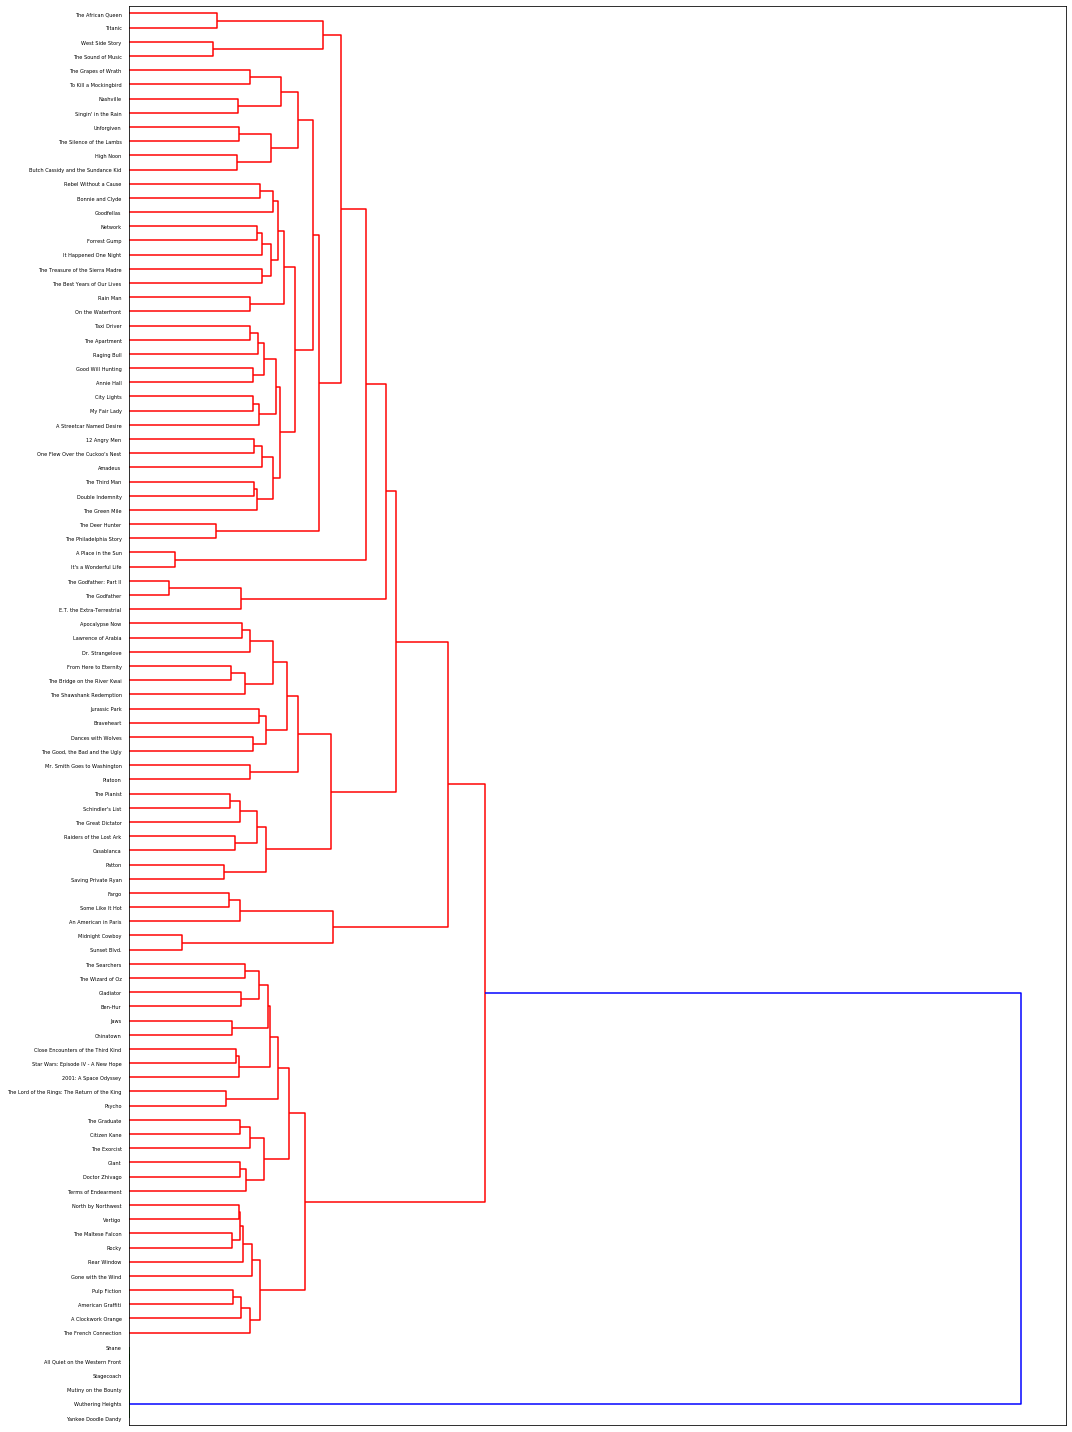

In [13]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances

fig, ax = plt.subplots(figsize=(15, 20)) # set size
ax = dendrogram(linkage_matrix, orientation="right", labels=titles);

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)

plt.tight_layout() #show plot with tight layout

#uncomment below to save figure
plt.savefig('ward_clusters.png', dpi=200) #save figure as ward_clusters

In [14]:
titles[89]

'Mutiny on the Bounty'

In [15]:
synopses[89]

'\n\nIt looks like we don\'t have a Synopsis for this title yet. Be the first to contribute! Just click the "Edit page" button at the bottom of the page or learn more in the Synopsis submission guide.\n\n'